In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("/Users/anthonymoubarak/Desktop/Data_Viz/2023-anly503-am4315/Project/ufo_data_nuforc.csv")

# convert date column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')

df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y', errors='coerce')
df['year'] = df['date'].dt.strftime('%Y')
df = df.sort_values(by=['date'], ascending=True)

df = df.sort_values(by=['date'] , ascending = True)

df

/var/folders/r_/fklxc5m54kl125_d3kkyjzp40000gn/T/ipykernel_31157/335015039.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/anthonymoubarak/Desktop/Data_Viz/2023-anly503-am4315/Project/ufo_data_nuforc.csv")


,posted,date,time,city,state,shape,duration,summary,images,year
113584,12/16/99,1973-01-01,23:30:00,Chattanooga,TN,Oval,30 sec.,3 objects in a tri-angle formation also in sta...,NaN,1973
90658,03/11/06,1973-01-08,21:00:00,Muscle Shoals,AL,Oval,20 seconds,Glowing orange detailess object with outline s...,NaN,1973
104522,11/20/02,1973-01-12,03:00:00,"Farmington (SE of, deserted area, Hwy 44)",NM,Light,aprox:2-3 min,A large bright light apeared seemingly from no...,NaN,1973
82505,02/14/08,1973-01-14,19:00:00,Scranton,PA,Rectangle,10 seconds,Rectangular object moving at a very high rate ...,NaN,1973
113583,12/16/99,1973-01-28,23:38:00,Glendora,CA,Disk,5-10 mins,An illuminated Saucer hovers over my back pati...,NaN,1973
...,...,...,...,...,...,...,...,...,...,...
106609,06/12/02,2023-01-11,21:00:00,Pasadena,CA,Circle,20 seconds,THESE OBJECTS SEEM TO MAKE OBVIOUS ATTEMPTS AT...,NaN,2023
11791,06/25/20,2023-01-11,21:00:00,New London,WI,Light,2-3 minutes,It was a disembodied blinking light. At first ...,NaN,2023
11790,06/25/20,2023-01-11,23:00:00,Manning,SC,Sphere,2 minutes,The object was metallic in color. Spherical in...,NaN,2023
13944,01/31/20,2023-01-11,17:00:00,Philadelphia,PA,Circle,10 minutes,Sighting of 4 circular lights that were in for...,NaN,2023


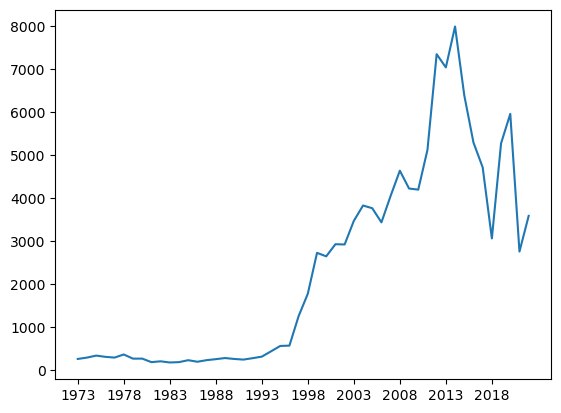

In [3]:
# Filter data to number of sightings per year
df_grouped = df.groupby(df['year']).size().reset_index(name='count')
df_grouped['year'] = df_grouped['year'].astype('int')
df_grouped = df_grouped[df_grouped['year'] != 2023]

# Set the x-axis intervals to 10 years
years = range(df_grouped['year'].min(), df_grouped['year'].max()+1, 5)
plt.xticks(years)

plt.plot(df_grouped['year'], df_grouped['count'])
